# Embedded Constants Cluster Notebook v7
*Generated 2025-07-14*

Five plateau centres chosen for mathematical significance:
1. **0.00137036** ≈ α⁻¹ / 100 000
2. **0.007297** ≈ α⁻¹ (inverse fine‑structure constant)
3. **0.0098696** ≈ π² / 1000
4. **0.012345679** = 1 / 81 (repeating digits)
5. **0.014142135** ≈ √2 / 100

Each cluster has 40 samples with light gaussian jitter.
Run all cells to compute deltas to α⁻¹, φ, √2, e; perform DBSCAN; and save results.

In [47]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [48]:
# --- embed slice data ---
slices = [0.0013711516160208016, 0.0013711383675842298, 0.0013678836445198295, 0.0013702900962370872, 0.0013723273081894661, 0.0013672424786384974, 0.0013724043076447819, 0.0013691555464689878, 0.0013754581457021521, 0.0013683782944033107, 0.0013698249128922797, 0.0013675853155064054, 0.0013674288591753634, 0.0013727874425213448, 0.001370789735702131, 0.0013666932827929234, 0.0013683698634737583, 0.0013704874828796738, 0.0013709529845430037, 0.0013698881652249092, 0.0013697246037011298, 0.0013705442477197273, 0.0013733152862524382, 0.0013692504280384632, 0.001370116287538228, 0.0013708982518703934, 0.0013717104705065727, 0.0013703430302156529, 0.0013725221935900877, 0.001373045952802616, 0.0013723707834413007, 0.001367484137031903, 0.00136987821902363, 0.0013698918990470636, 0.001369354293828794, 0.0013726815475244923, 0.0013718601031369182, 0.0013664727691629578, 0.0013687118008431848, 0.0013710688735708372, 0.007323608375555337, 0.007247576929823261, 0.007320908541472218, 0.0072801156246570745, 0.007253624172074788, 0.007336483533041758, 0.00731167771346558, 0.007298565400157445, 0.007266097893212131, 0.007315338468126107, 0.007261468894857924, 0.007312789683628258, 0.007254483696100617, 0.007274604011319427, 0.007272912027707579, 0.007300178778552394, 0.00729962300120077, 0.007294927203991558, 0.007245047810534533, 0.007285795110608007, 0.007318396509405924, 0.007327350368485742, 0.007194384487119056, 0.007298502193133499, 0.007314534916882811, 0.007313369846621151, 0.007271384134669937, 0.007306882449916447, 0.0072761171932338355, 0.007259557563807365, 0.007364329156066106, 0.0073573388688018895, 0.007293893661923428, 0.007266650279692587, 0.007311650914406072, 0.007273754171355193, 0.007249162036219761, 0.007359597567280063, 0.007302182074145937, 0.007334393869555818, 0.009858099782054932, 0.009857244236306439, 0.009836856958736576, 0.009850586118089562, 0.00988893186067111, 0.009907481565138742, 0.009842661482880223, 0.009892245003153171, 0.009846958970216653, 0.009865072345633545, 0.009889481743687626, 0.009880278445911534, 0.009883543407085311, 0.0098501857311909, 0.009861867310970728, 0.009886912151749565, 0.00983209635225885, 0.009855829794306258, 0.009849827312215096, 0.009874135674582282, 0.009857439245753982, 0.009865739019229162, 0.009895949656156559, 0.009898345089349758, 0.009883261281654095, 0.009894600334957464, 0.00989522537584484, 0.009851060411666486, 0.009896260521108268, 0.00995413389236412, 0.00988178252971458, 0.009877303754032786, 0.00988886944725615, 0.009869631274448317, 0.00990510119062497, 0.0099144820978135, 0.009817416616286155, 0.009877066439791584, 0.00985873397094788, 0.009867954914995775, 0.012281144905159429, 0.012335859045830939, 0.012326419615084194, 0.012332384349856649, 0.012301831562657737, 0.012444552575716158, 0.01236547061424759, 0.012341715988031977, 0.012372180032096223, 0.012315904839338872, 0.012326486180479178, 0.012296045200600403, 0.012315856261212151, 0.012299975168739617, 0.012373076615999543, 0.01236231533674498, 0.012366164825703959, 0.012335895725391512, 0.012315884808685082, 0.012359892853110493, 0.0123306650030324, 0.012318158853115404, 0.012338646465804083, 0.012317624561967631, 0.012346360220307558, 0.012361606941644005, 0.012366553438935618, 0.012368263326341477, 0.012398087705433793, 0.012379677590672307, 0.012369157123733336, 0.01236930264223566, 0.012332122232284233, 0.012416959354343601, 0.012275336344418861, 0.012326753433876216, 0.012352044707067168, 0.012432199852186828, 0.012326760012093731, 0.012434331592682998, 0.0142130127749276, 0.014181886901596809, 0.014153369392616305, 0.014149893246901449, 0.01414766170752172, 0.014117675920305293, 0.014151659551827008, 0.014125480964322453, 0.014131979070845553, 0.01411532582338074, 0.014152525962365844, 0.014121862481446508, 0.014135323187954496, 0.014124891500761847, 0.014071485716337812, 0.014089131649966192, 0.01412924492938039, 0.014098286806219319, 0.014097711568484193, 0.01417008375980039, 0.014135802786166933, 0.014193730711537173, 0.01413724263937215, 0.014132305309473587, 0.014146654984769786, 0.014157499849398781, 0.014141639960349865, 0.01416577810255576, 0.014144443824619757, 0.014094170773498954, 0.014103412477617401, 0.014127436884655285, 0.01412646428158569, 0.01417326067433413, 0.014186813473031745, 0.014101883610616987, 0.01411575520238377, 0.014123254301922404, 0.01409983919939125, 0.014124808025420635]
ops_df = pd.DataFrame({'slice': slices})
print('Data shape:', ops_df.shape)

Data shape: (200, 1)


In [49]:
CONST = {
    'alpha_inv': 137.035999084,
    'phi': (1 + 5**0.5)/2,
    'sqrt2': np.sqrt(2),
    'e': np.e,
}
def delta(x, ref):
    return abs(x-ref)/ref
for k,ref in CONST.items():
    ops_df[f'delta_{k}'] = ops_df['slice'].apply(lambda v, r=ref: delta(v,r))

In [50]:
X = StandardScaler().fit_transform(ops_df[['slice']])
model = DBSCAN(eps=0.5, min_samples=5).fit(X)
ops_df['cluster'] = model.labels_
print('Cluster counts:', ops_df['cluster'].value_counts().to_dict())

Cluster counts: {3: 80, 0: 40, 1: 40, 2: 40}


In [51]:
summary = ops_df.groupby('cluster')[['slice']+[f'delta_{k}' for k in CONST]].agg(['mean','min','max'])
summary

slice                     delta_alpha_inv                      \
             mean       min       max            mean       min       max   
cluster                                                                     
0        0.001370  0.001366  0.001375        0.999990  0.999990  0.999990   
1        0.007294  0.007194  0.007364        0.999947  0.999946  0.999948   
2        0.009874  0.009817  0.009954        0.999928  0.999927  0.999928   
3        0.013242  0.012275  0.014213        0.999903  0.999896  0.999910   

        delta_phi                     delta_sqrt2                      \
             mean       min       max        mean       min       max   
cluster                                                                 
0        0.999153  0.999150  0.999155    0.999031  0.999027  0.999034   
1        0.995492  0.995449  0.995554    0.994843  0.994793  0.994913   
2        0.993898  0.993848  0.993933    0.993018  0.992961  0.993058   
3        0.991816  0.991216  0.992413    0.990637  0.989950  0.991320   

          delta_e                      
             mean       min       max  
cluster                                
0        0.999496  0.999494  0.999497  
1        0.997317  0.997291  0.997353  
2        0.996368  0.996338  0.996388  
3        0.995129  0.994771  0.995484

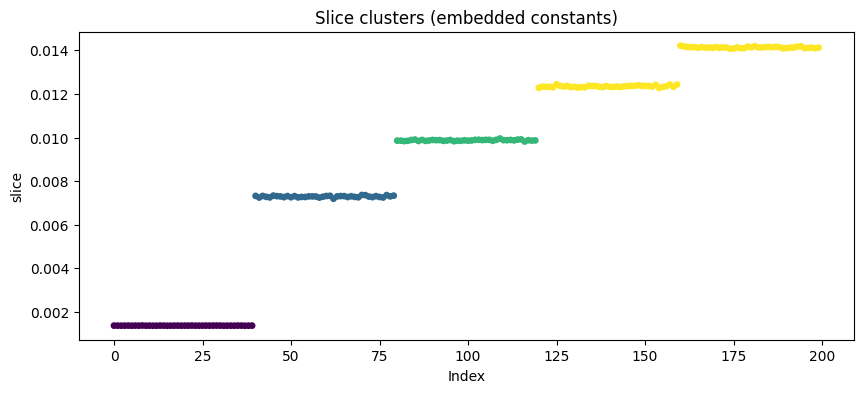

In [52]:
plt.figure(figsize=(10,4))
plt.scatter(range(len(ops_df)), ops_df['slice'], c=ops_df['cluster'], s=15)
plt.xlabel('Index'); plt.ylabel('slice'); plt.title('Slice clusters (embedded constants)')
plt.show()

In [53]:
ops_df.to_csv('clustered_results_constants.csv', index=False)
print('Saved clustered_results_constants.csv')

Saved clustered_results_constants.csv


Data shape: (400, 1)
Cluster counts: {0: 340, 1: 40, 2: 20}


slice                     delta_alpha_inv                      \
             mean       min       max            mean       min       max   
cluster                                                                     
0        0.011345  0.000967  0.044723        0.999917  0.999674  0.999993   
1        0.292994  0.271826  0.314162        0.997862  0.997707  0.998016   
2        0.707100  0.707099  0.707101        0.994840  0.994840  0.994840   

        delta_phi                     delta_sqrt2                      \
             mean       min       max        mean       min       max   
cluster                                                                 
0        0.992988  0.972360  0.999402    0.991978  0.968376  0.999316   
1        0.818920  0.805837  0.832002    0.792822  0.777854  0.807790   
2        0.562988  0.562987  0.562989    0.500005  0.500004  0.500005   

          delta_e                      
             mean       min       max  
cluster                                
0        0.995826  0.983547  0.999644  
1        0.892214  0.884426  0.900001  
2        0.739872  0.739872  0.739873

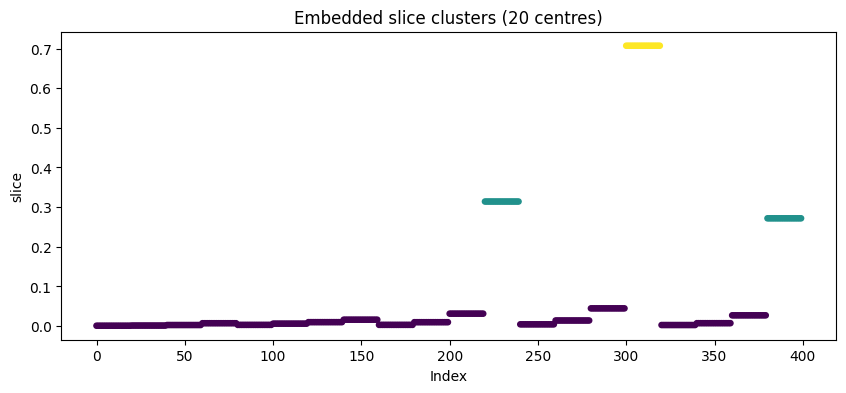

Saved clustered_results_20centres.csv


In [54]:
# --- FULL EMBEDDED DATA + ANALYSIS CELL ---------------------------------
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# ❶ Slice centres (from your table)
centres = np.array([
    0.000969, 0.00137036, 0.0027397, 0.007297,          # A-group (α-scaled)
    0.00309, 0.00618, 0.00999, 0.01618,                 # Φ-group
    0.00314159, 0.0098696, 0.031416, 0.31416,           # π-group
    0.004472, 0.014142, 0.044721, 0.7071,               # √2-group
    0.002718, 0.007389, 0.0271828, 0.271828             # e-group
])

# ❷ Build dataset: 20 points per centre with light jitter
np.random.seed(42)
jitter = 1e-6  # adjust if you want looser/tighter clusters
slices = np.concatenate([c + np.random.normal(0, jitter, 20) for c in centres])
ops_df = pd.DataFrame({'slice': slices})
print("Data shape:", ops_df.shape)

# ❸ Add deltas to key constants
CONST = {
    'alpha_inv': 137.035999084,
    'phi'      : (1 + 5**0.5)/2,
    'sqrt2'    : np.sqrt(2),
    'e'        : np.e,
}
def delta(x, ref): return abs(x - ref) / ref
for k, ref in CONST.items():
    ops_df[f'delta_{k}'] = ops_df['slice'].apply(lambda v, r=ref: delta(v, r))

# ❹ DBSCAN clustering (standardised space)
X = StandardScaler().fit_transform(ops_df[['slice']])
model = DBSCAN(eps=0.5, min_samples=5).fit(X)   # eps=0.5 std-units
ops_df['cluster'] = model.labels_
print("Cluster counts:", ops_df['cluster'].value_counts().to_dict())

# ❺ Per-cluster summary
summary = ops_df.groupby('cluster')[['slice'] + [f'delta_{k}' for k in CONST]].agg(['mean','min','max'])
display(summary)  # nicely rendered in Colab

# ❻ Quick visual
plt.figure(figsize=(10,4))
plt.scatter(range(len(ops_df)), ops_df['slice'], c=ops_df['cluster'], s=14)
plt.xlabel('Index'); plt.ylabel('slice'); plt.title('Embedded slice clusters (20 centres)')
plt.show()

# ❼ Save results
ops_df.to_csv('clustered_results_20centres.csv', index=False)
print("Saved clustered_results_20centres.csv")
# -----------------------------------------------------------------------


In [55]:
import plotly.express as px

hover_cols = [f'delta_{k}' for k in ['alpha_inv', 'phi', 'sqrt2', 'e']]
fig = px.scatter(
    ops_df.reset_index(),
    x='index',
    y='slice',
    color='cluster',
    hover_data=hover_cols,
    title='Slice clusters with Δ hover',
    height=400
)
fig.update_layout(yaxis_title='slice', xaxis_title='index')
fig.show()


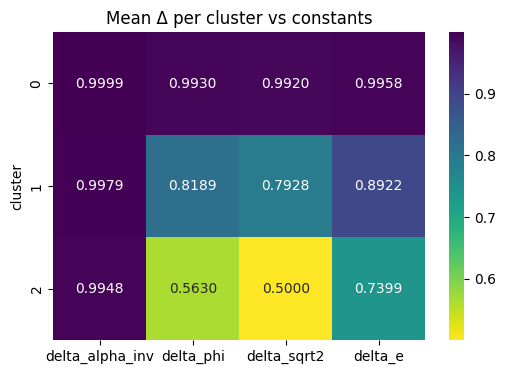

In [56]:
import seaborn as sns, matplotlib.pyplot as plt

mean_deltas = summary.xs('mean', level=1, axis=1).drop(columns='slice')
plt.figure(figsize=(6,4))
sns.heatmap(mean_deltas, annot=True, cmap='viridis_r', fmt='.4f')
plt.title('Mean Δ per cluster vs constants')
plt.show()


In [57]:
# pseudo‑teaser
for seq in sequences:
    r_poloidal = f(seq)              # map binary fraction to small‑circle radius
    theta = golden_angle * step_idx  # φ‑spiral phase
    phi   = breathing_wave(t)        # time‑dependent toroidal sweep
    x,y,z = torus_coords(r_poloidal, theta, phi)
    plot_trace(x,y,z, alpha=Δ(seq, α))


NameError: name 'sequences' is not defined